In [1]:
import pandas as pd
import os
import pickle
from functools import reduce
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
file_path = "..\..\data\ECO\ECO_processed.pkl"



device_dict = pd.read_pickle(file_path)
data_frequency = 7/3600  # as a fraction of an hour used for kWh conversion



FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\data\\ECO\\ECO_processed.pkl'

In [26]:
device_dict.keys()

dict_keys(['fridge', 'hair dryer', 'coffee maker', 'kettle', 'washing machine', 'computer', 'freezer', 'tablet computer charger', 'dish washer', 'air handling unit', 'HTPC', 'lamp', 'laptop computer', 'audio system', 'small cooking appliance', 'games console', 'microwave', 'garden sprinkler', 'broadband router'])

In [27]:
device_dict["fridge"][0]

physical_quantity,power
type,active
2012-06-01 01:59:56+02:00,49.2516
2012-06-01 02:00:03+02:00,51.3899
2012-06-01 02:00:10+02:00,49.2516
2012-06-01 02:00:17+02:00,49.2516
2012-06-01 02:00:24+02:00,51.3899
...,...
2012-06-04 21:50:48+02:00,47.1132
2012-06-04 21:50:55+02:00,47.1132
2012-06-04 21:51:02+02:00,47.1132


In [31]:
device_dict["coffee maker"][0]



test = pd.concat(device_dict["coffee maker"], axis=0)

test.sort_index(inplace=True)
test

physical_quantity,power
type,active
2012-06-27 01:59:56+02:00,0.00000
2012-06-27 01:59:56+02:00,4.48706
2012-06-27 02:00:03+02:00,4.48706
2012-06-27 02:00:03+02:00,0.00000
2012-06-27 02:00:10+02:00,0.00000
...,...
2013-02-01 00:59:42+01:00,0.00000
2013-02-01 00:59:48+01:00,0.00000
2013-02-01 00:59:49+01:00,0.00000


In [32]:


# Initialize an empty list to store device dataframes
data_dict = {}
total_consumption = pd.DataFrame()




# Iterate over each device
for device in tqdm(device_dict):
    
    # check if df is empty
    if len(device_dict[device]) == 0:
        continue
    # Concatenate all daily dataframes for the current device
    device_df = pd.concat(device_dict[device], axis=0)
    # Sort the index
    device_df.sort_index(inplace=True)
    # Reset the index (to handle any potential index related issues)
    device_df = device_df.reset_index()
    # Rename the columns to include the device name for uniqueness
    device_df.columns = ['date', device]

    # set the date column as the index
    device_df.set_index('date', inplace=True)
    print(device_df.head())
    continue
    # Convert the data to kWh
    device_df = watts2kwh(device_df, data_frequency)

    if total_consumption.empty:
        total_consumption = device_df.copy()
        total_consumption.columns = ["total"]
        # print(total_consumption.head())
    else:
        print(type(device_dict[device]))
        total_consumption = pd.merge(total_consumption, device_df, on='date', how='inner')
        total_consumption["total"] = total_consumption["total"] + total_consumption[device]
        total_consumption.drop(device, axis=1, inplace=True)
        print(device_df.head())
        break


  
    # calculate load profiles and save them in a dictionary
    data_dict[device] = calculate_loadprofiles(device_df)
    

  5%|▌         | 1/19 [00:01<00:19,  1.07s/it]

                             fridge
date                               
2012-06-01 01:59:56+02:00  49.25160
2012-06-01 01:59:56+02:00   2.21458
2012-06-01 02:00:03+02:00   0.00000
2012-06-01 02:00:03+02:00  51.38990
2012-06-01 02:00:10+02:00  49.25160
                           hair dryer
date                                 
2012-06-01 01:59:56+02:00     830.508
2012-06-01 02:00:03+02:00     832.641
2012-06-01 02:00:10+02:00     832.641
2012-06-01 02:00:17+02:00     834.774
2012-06-01 02:00:24+02:00     843.307


 16%|█▌        | 3/19 [00:01<00:05,  2.72it/s]

                           coffee maker
date                                   
2012-06-27 01:59:56+02:00       0.00000
2012-06-27 01:59:56+02:00       4.48706
2012-06-27 02:00:03+02:00       4.48706
2012-06-27 02:00:03+02:00       0.00000
2012-06-27 02:00:10+02:00       0.00000
                           kettle
date                             
2012-06-01 01:59:56+02:00     0.0
2012-06-01 01:59:56+02:00     0.0
2012-06-01 02:00:03+02:00     0.0
2012-06-01 02:00:03+02:00     0.0
2012-06-01 02:00:10+02:00     0.0


 26%|██▋       | 5/19 [00:01<00:03,  4.04it/s]

                           washing machine
date                                      
2012-06-01 01:59:56+02:00          4.39739
2012-06-01 02:00:03+02:00          4.39739
2012-06-01 02:00:10+02:00          4.39739
2012-06-01 02:00:17+02:00          4.39739
2012-06-01 02:00:24+02:00          6.53380


 32%|███▏      | 6/19 [00:01<00:03,  3.90it/s]

                           computer
date                               
2012-06-01 01:59:56+02:00   77.6168
2012-06-01 02:00:03+02:00   77.6168
2012-06-01 02:00:10+02:00   77.6168
2012-06-01 02:00:17+02:00   77.6168
2012-06-01 02:00:24+02:00   75.4641


 53%|█████▎    | 10/19 [00:04<00:03,  2.71it/s]

                            freezer
date                               
2012-06-01 01:59:56+02:00   2.23178
2012-06-01 01:59:56+02:00  53.65100
2012-06-01 02:00:03+02:00  53.65100
2012-06-01 02:00:03+02:00   2.23178
2012-06-01 02:00:10+02:00   0.00000
                           dish washer
date                                  
2012-06-01 01:59:56+02:00          0.0
2012-06-01 02:00:03+02:00          0.0
2012-06-01 02:00:10+02:00          0.0
2012-06-01 02:00:17+02:00          0.0
2012-06-01 02:00:24+02:00          0.0
                           air handling unit
date                                        
2012-06-01 01:59:56+02:00                0.0
2012-06-01 02:00:03+02:00                0.0
2012-06-01 02:00:10+02:00                0.0
2012-06-01 02:00:17+02:00                0.0
2012-06-01 02:00:24+02:00                0.0
                           HTPC
date                           
2012-06-01 01:59:56+02:00   0.0
2012-06-01 02:00:03+02:00   0.0
2012-06-01 02:00:10+02:00   0.0


 63%|██████▎   | 12/19 [00:05<00:03,  1.96it/s]

                           lamp
date                           
2012-06-01 01:59:56+02:00   0.0
2012-06-01 02:00:03+02:00   0.0
2012-06-01 02:00:10+02:00   0.0
2012-06-01 02:00:17+02:00   0.0
2012-06-01 02:00:24+02:00   0.0


 74%|███████▎  | 14/19 [00:06<00:02,  2.33it/s]

                           laptop computer
date                                      
2012-06-01 01:59:56+02:00              0.0
2012-06-01 02:00:03+02:00              0.0
2012-06-01 02:00:10+02:00              0.0
2012-06-01 02:00:17+02:00              0.0
2012-06-01 02:00:24+02:00              0.0
                           audio system
date                                   
2012-06-01 01:59:56+02:00           0.0
2012-06-01 02:00:03+02:00           0.0
2012-06-01 02:00:10+02:00           0.0
2012-06-01 02:00:17+02:00           0.0
2012-06-01 02:00:24+02:00           0.0


 79%|███████▉  | 15/19 [00:06<00:01,  2.83it/s]

                           small cooking appliance
date                                              
2012-06-27 01:59:56+02:00                  2.16516
2012-06-27 02:00:03+02:00                  0.00000
2012-06-27 02:00:10+02:00                  0.00000
2012-06-27 02:00:17+02:00                  0.00000
2012-06-27 02:00:24+02:00                  0.00000
                           games console
date                                    
2012-11-14 17:26:30+01:00            0.0
2012-11-14 17:26:37+01:00            0.0
2012-11-14 17:26:44+01:00            0.0
2012-11-14 17:26:51+01:00            0.0
2012-11-14 17:26:58+01:00            0.0


100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                           microwave
date                                
2012-06-26 13:36:05+02:00    52.9853
2012-06-26 13:36:12+02:00    50.8707
2012-06-26 13:36:19+02:00    50.8707
2012-06-26 13:36:26+02:00    50.8707
2012-06-26 13:36:33+02:00    52.9853
                           garden sprinkler
date                                       
2012-06-27 01:59:56+02:00           8.72041
2012-06-27 02:00:03+02:00           8.72041
2012-06-27 02:00:10+02:00           8.72041
2012-06-27 02:00:17+02:00           8.72041
2012-06-27 02:00:24+02:00           8.72041
                           broadband router
date                                       
2012-06-27 01:59:56+02:00           19.3387
2012-06-27 02:00:03+02:00           19.3387
2012-06-27 02:00:10+02:00           19.3387
2012-06-27 02:00:17+02:00           21.4710
2012-06-27 02:00:24+02:00           19.3387


In [25]:
total_consumption.head()



,total
date,
2012-06-01 01:59:56+02:00,0.001711
2012-06-01 01:59:56+02:00,0.001619
2012-06-01 02:00:03+02:00,0.001719
2012-06-01 02:00:03+02:00,0.001619
2012-06-01 02:00:10+02:00,0.001715


In [9]:

# watts to kWh conversion, where data_frequency is the fraction of an hour if we have 7 seconds data, then data_frequency = 7/3600
def watts2kwh(df,data_frequency):
    df = df/1000 * data_frequency
    return df


def calculate_loadprofiles(df):
    # resample to daily and hourly
    hourly = df.resample('H').sum()
    daily = df.resample('D').sum()


        
    # daily load profile
    loadprofile_daily = hourly.groupby(hourly.index.hour).mean()

    # weekly load profile
    loadprofile_weekly = daily.groupby(daily.index.dayofweek).mean()

    # monthly load profile
    loadprofile_monthly = daily.groupby(daily.index.day).mean()

    # save to dictioanry
    loadprofiles = {
        "daily": loadprofile_daily.values,
        "weekly": loadprofile_weekly.values,
        "monthly": loadprofile_monthly.values
    }
    return loadprofiles


def total_loadprofile(dict):
    daily = []
    weekly = []
    monthly = []

    
    for device_lp in dict:
        if len(daily) == 0:
            daily = dict[device_lp]["daily"]
            weekly = dict[device_lp]["weekly"]
            monthly = dict[device_lp]["monthly"]
            
        else:
            daily = daily + dict[device_lp]["daily"]
            weekly = weekly + dict[device_lp]["weekly"]
            print("monthly: ", monthly, "\n----------------------------------\n", dict[device_lp]["monthly"])
            monthly = monthly + dict[device_lp]["monthly"]

    loadprofile = {
        "daily": daily,
        "weekly": weekly,
        "monthly": monthly
    }
    return loadprofile




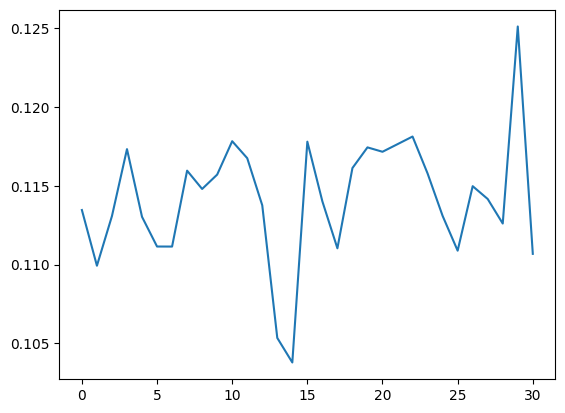

In [10]:
data_dict["fridge"]["daily"]

# plot numpy array
plt.plot(data_dict["fridge"]["monthly"])


In [11]:

total = total_loadprofile(data_dict)
total["daily"]

monthly:  [[0.11345791]
 [0.10992732]
 [0.11307592]
 [0.1173188 ]
 [0.11302764]
 [0.11114454]
 [0.11114181]
 [0.11595423]
 [0.11479372]
 [0.11570318]
 [0.11782077]
 [0.11674556]
 [0.11375766]
 [0.1053494 ]
 [0.10379347]
 [0.11779074]
 [0.11400665]
 [0.11103141]
 [0.11611867]
 [0.1174296 ]
 [0.11715123]
 [0.11763334]
 [0.11811687]
 [0.11577474]
 [0.11308618]
 [0.11088126]
 [0.11497007]
 [0.11415739]
 [0.11260169]
 [0.12509391]
 [0.11067944]] 
----------------------------------
 [[1.66480633e-02]
 [8.13146985e-03]
 [4.92326751e-02]
 [4.98921861e-05]
 [3.07075358e-02]
 [4.51109251e-02]
 [4.52975677e-02]
 [2.09739231e-02]
 [8.67095987e-03]
 [3.24981820e-02]
 [2.85181359e-02]
 [2.02551879e-02]
 [3.89023344e-02]
 [1.62321196e-02]
 [2.07975326e-02]
 [1.94910518e-02]
 [1.15405017e-02]
 [4.18437321e-03]
 [1.41452992e-02]
 [4.69384779e-02]
 [2.32681874e-02]
 [2.67327995e-05]
 [4.99441461e-03]
 [1.17121166e-02]
 [1.89182176e-02]
 [2.08667637e-02]
 [3.46150272e-02]
 [3.63750290e-02]
 [1.45879698e-

ValueError: operands could not be broadcast together with shapes (31,1) (30,1) 

<Axes: xlabel='date'>

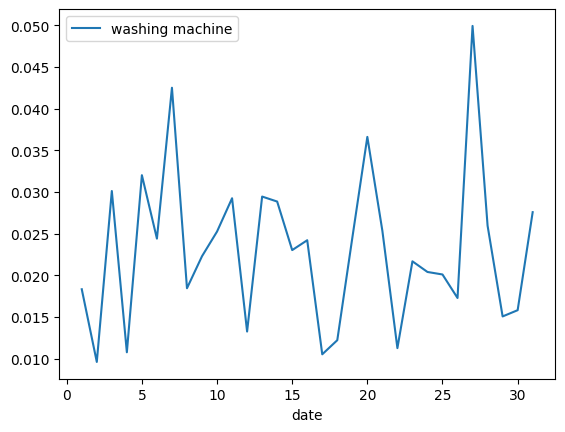

In [54]:
# save to pickle

with open('..\..\data\ECO\ECO_loadprofiles.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

    